In [1]:
import csv
data_file = csv.DictReader(open("./visits/data/visits_CMT.owl_class_500.csv", "r"))
data_file.fieldnames


['nodeNumber', 'node', 'visits', 'paths']

In [2]:
data = {}
for column in data_file.fieldnames:
    data[column] = []
data


{'nodeNumber': [], 'node': [], 'visits': [], 'paths': []}

In [3]:
for row in data_file:
    for column in data.keys():
        data[column].append(row[column])

len(data['node'])


33

In [5]:
top_visits = max(data['visits'])
top_visits

'87'

In [7]:
visits_int = []
for visit in data['visits']:
    visits_int.append(int(visit))

In [8]:
data['visits'] = visits_int
type(data['visits'][0])

int

In [10]:
top_visits = max(data['visits'])
top_visits


227

In [12]:
# iniciaremos variáveis para nos ajudar no cálculo
sum_visits = 0
total_visits = 0

for visit in data['visits']:
    # temos idades não informadas! vamos nos certificar que estamos contando apenas
    # pessoas que temos certeza de suas idades!
    if visit != -1:
        # incrementamos então a idade ao somatório de idades
        sum_visits += visit
        # e incrementamos 1 no total de idades
        total_visits += 1

# calculamos a média
visits_mean = sum_visits / total_visits

# arredondamos usando uma função built-in do Python
print(round(visits_mean, 1))

32.5


In [14]:
# iniciaremos variáveis para nos ajudar no cálculo
sum_visits = 0
total_visits = 0
# list de visitas
visits = data["visits"]
nodes_c = []
visits_c = []
data_conceitos = {"node_c" : [],
                 "visit_c" : []}
for idx, node in enumerate (data["node"]):
    # vamos varrer o dicionario de nós pegando apenas os nós de conceitos
    if node.find("<") == -1 and node.find("~") == -1:
        print("contei: "+node)
        
        for i, visit in enumerate (visits):
            if i == idx:
                print ( i)
                print (visit)
                sum_visits += visit
                # e incrementamos 1 no total de visitas
                total_visits += 1
                nodes_c.append(node)
                visits_c.append(visit)
                
    else:
        print("descartei--->"+node)
        print(data["visits"][idx])

data_conceitos["node_c"] = nodes_c
data_conceitos["visit_c"] = visits_c

# calculamos a média
visits_mean = sum_visits / total_visits

# arredondamos usando uma função built-in do Python
#print(round(visits_mean, 1))
print (sum_visits)
print (total_visits)
print (visits_mean)

contei: Co-author
0
0
contei: User
1
73
contei: ProgramCommittee
2
20
contei: AuthorNotReviewer
3
15
contei: Conference
4
6
contei: SubjectArea
5
13
contei: PaperFullVersion
6
25
contei: Document
7
66
contei: ProgramCommitteeMember
8
33
contei: ConferenceMember
9
87
contei: Acceptance
10
17
contei: Administrator
11
23
contei: ProgramCommitteeChair
12
19
contei: Review
13
40
contei: Reviewer
14
30
contei: Bid
15
13
contei: Meta-Review
16
21
contei: ExternalReviewer
17
21
contei: Chairman
18
13
contei: Paper
19
53
contei: Author
20
30
contei: AssociatedChair
21
13
contei: Person
22
227
contei: Preference
23
18
contei: Decision
24
49
contei: ConferenceChair
25
17
contei: Rejection
26
13
contei: Meta-Reviewer
27
13
contei: PaperAbstract
28
15
descartei--->bjectMinCardinality(0 <http://cmt/hasDecision> owl:Thing
22
descartei--->bjectMinCardinality(1 <http://cmt/readByReviewer> owl:Thing
23
descartei--->bjectComplementOf(ObjectMinCardinality(2 <http://cmt/hasDecision> owl:Thing)
26
descartei

In [17]:
%matplotlib inline 
#comando para dizer pro Jupyter exibir os gráficos
import seaborn as sns #pacote grafico que deixa as coisas mais bonitas :)


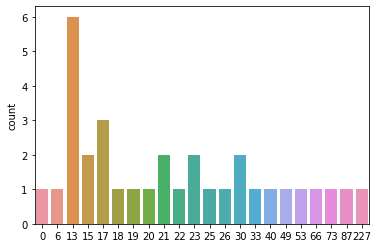

In [18]:
sns.countplot(data["visits"])

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
data_classes = pd.read_csv('./visits/data/visits_CMT.owl_class_500.csv', header = 0, sep=",")
order = pd.read_csv('./visits/data/visits_Order_CMT.owl_class_500.csv', header = 0, sep=",")
ant = pd.read_csv('./visits/data/visits_ant_CMT.owl_class_500.csv', header = 0, sep=",")
data_classes.head()

,nodeNumber,node,visits,paths
0,0,Co-author,0,
1,1,User,73,User Meta-Reviewer Reviewer User AuthorNotRe...
2,2,ProgramCommittee,20,ProgramCommittee ProgramCommittee ProgramCom...
3,3,AuthorNotReviewer,15,AuthorNotReviewer AuthorNotReviewer AuthorNo...
4,4,Conference,6,Conference Conference Conference Conference ...


In [20]:
order.head()


,nodeId,nodeName,nodeType,nodeLevel,loop,hop,path
0,28,PaperAbstract,Class,-1,0,0,PaperAbstract
1,19,Paper,Class,-1,0,1,PaperAbstract Paper
2,31,bjectComplementOf(ObjectMinCardinality(2 <http...,RestrictionComplementOfRestrictionCardinality,-1,0,2,PaperAbstract Paper hasDecision owl:Thing
3,22,Person,Class,-1,1,0,Person
4,17,ExternalReviewer,Class,-1,2,0,ExternalReviewer


In [21]:
ant.head()

,rootId,root,childId,child,incremental visits
28,PaperAbstract,19,Paper,1,PaperAbstract Paper
19,Paper,31,bjectComplementOf(ObjectMinCardinality(2 <http...,1,PaperAbstract Paper hasDecision owl:Thing
17,ExternalReviewer,22,Person,2,ExternalReviewer Person
1,User,22,Person,3,User Person
27,Meta-Reviewer,14,Reviewer,1,Meta-Reviewer Reviewer


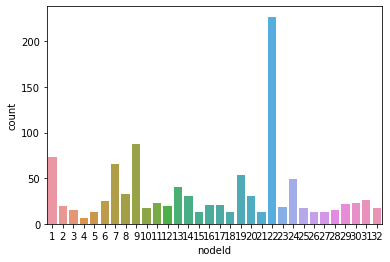

In [22]:
sns.countplot(order["nodeId"])

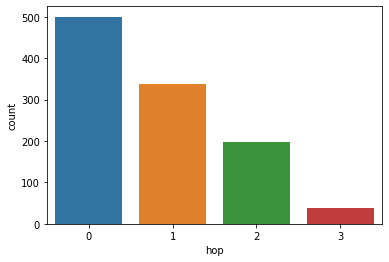

In [23]:
sns.countplot(order["hop"])

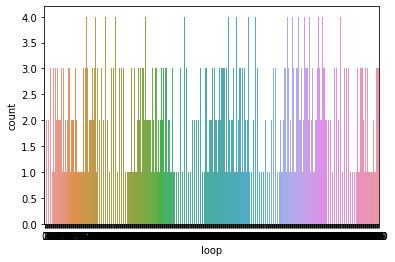

In [24]:
sns.countplot(order["loop"])

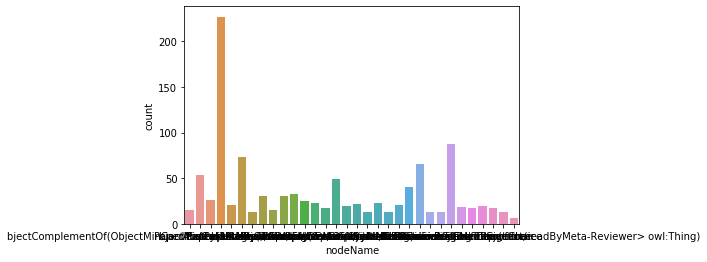

In [25]:
sns.countplot(order["nodeName"])

In [26]:
categories = list(data_classes.iloc[:,1:2])


In [27]:
data_classes['visits'].astype(int)

0       0
1      73
2      20
3      15
4       6
5      13
6      25
7      66
8      33
9      87
10     17
11     23
12     19
13     40
14     30
15     13
16     21
17     21
18     13
19     53
20     30
21     13
22    227
23     18
24     49
25     17
26     13
27     13
28     15
29     22
30     23
31     26
32     17
Name: visits, dtype: int64

In [28]:
vis = list(data_classes.iloc[:,2:3])


In [29]:
print(data_classes.iloc[:,2:3].sum().values)

[1071]


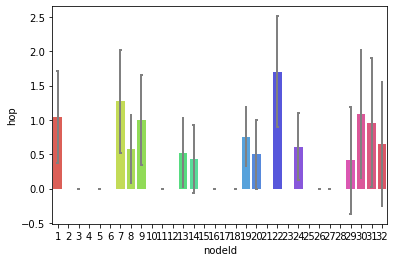

In [31]:
#sns.barplot(x = 'nodeId',  y='loop', hue = 'nodeId', data = order,

sns.barplot(x = 'nodeId',  y='hop', data = order,
            palette = 'hls',
            #order = ['male', 'female'],  
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            )

In [34]:
import numpy as np #pacote numérico usado na maioria das aplicações python


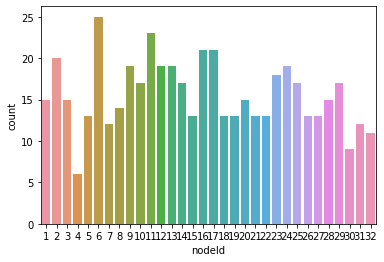

In [35]:
sns.countplot(x='nodeId', data=order[order.hop.isin([0])] )

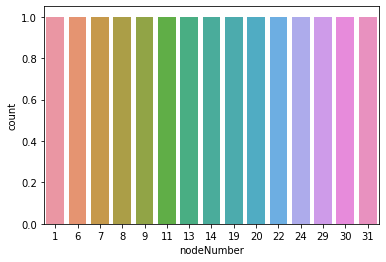

In [43]:
sns.countplot(x='nodeNumber', data=data_classes.query('visits > 21') ) #q75 node with more than 30 visits

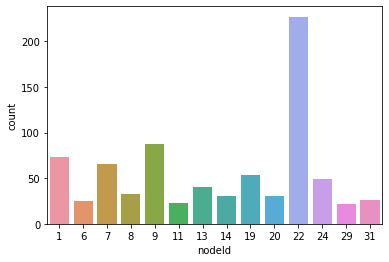

In [45]:
sns.countplot(x='nodeId', data=order.query('nodeId in [1,6,7,8,9,11,13,14,19,20,22,24,29,20,31]') ) #q75 node with more than 21 visits

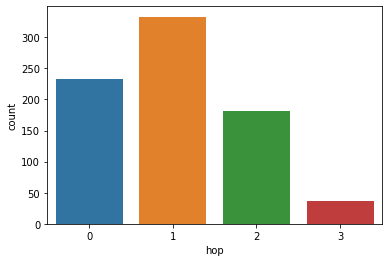

In [46]:
sns.countplot(x='hop', data=order.query('nodeId in [1,6,7,8,9,11,13,14,19,20,22,24,29,20,31]') ) #q75 node with more than 21 visits

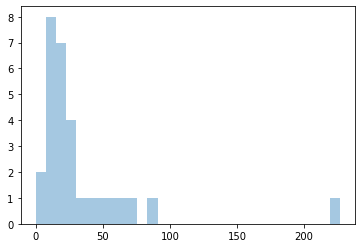

In [47]:
sns.distplot(visits_c,bins=30,kde=False)

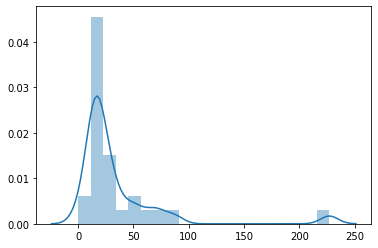

In [48]:
sns.distplot(visits_c, bins=20)

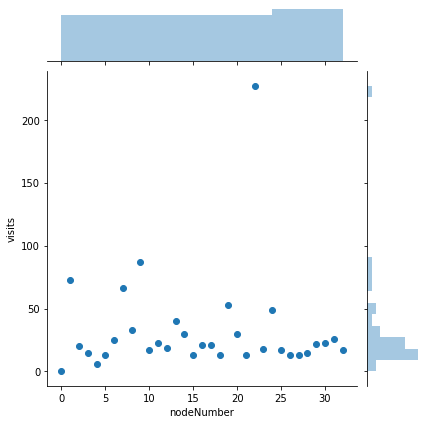

In [49]:
sns.jointplot(x="nodeNumber", y="visits", data=data_classes);

In [50]:
fieldnames=data_conceitos.keys()
fieldnames

dict_keys(['node_c', 'visit_c'])

In [51]:
import pandas
randomWalk = pandas.read_csv("./visits/data/visits_CMT.owl_class_500.csv")

In [52]:
randomWalk.head()

,nodeNumber,node,visits,paths
0,0,Co-author,0,
1,1,User,73,User Meta-Reviewer Reviewer User AuthorNotRe...
2,2,ProgramCommittee,20,ProgramCommittee ProgramCommittee ProgramCom...
3,3,AuthorNotReviewer,15,AuthorNotReviewer AuthorNotReviewer AuthorNo...
4,4,Conference,6,Conference Conference Conference Conference ...


In [53]:
randomWalk.visits.mean()

32.45454545454545

In [54]:
randomWalk.visits.describe()

count     33.000000
mean      32.454545
std       39.882712
min        0.000000
25%       15.000000
50%       21.000000
75%       30.000000
max      227.000000
Name: visits, dtype: float64

In [55]:
q25 = randomWalk.quantile(0.25)
q25

nodeNumber     8.0
visits        15.0
Name: 0.25, dtype: float64

In [56]:
q75 = randomWalk.quantile(0.75)
q75

nodeNumber    24.0
visits        30.0
Name: 0.75, dtype: float64

In [57]:
np.median(randomWalk['visits'])

21.0

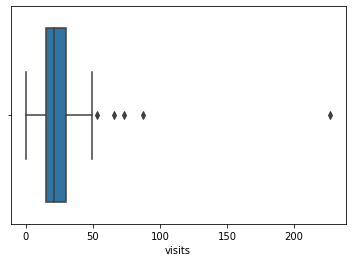

In [58]:
sns.boxplot(randomWalk.visits)

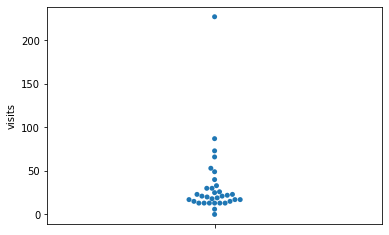

In [59]:
sns.swarmplot(randomWalk['visits'], orient="v")

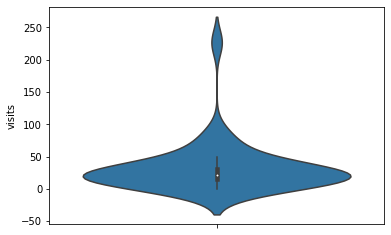

In [60]:
sns.violinplot(randomWalk['visits'], orient="v")

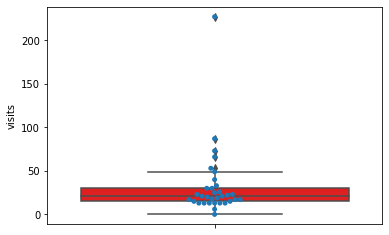

In [61]:
sns.swarmplot(randomWalk['visits'], orient="v")
sns.boxplot(randomWalk.visits, orient="v", color="red")

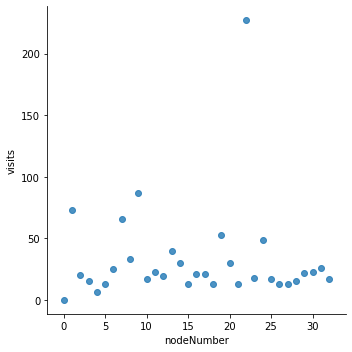

In [62]:
sns.lmplot( y="visits", x="nodeNumber", data=randomWalk, fit_reg=False)

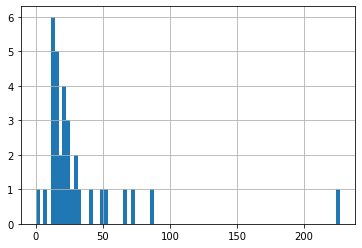

In [63]:
randomWalk.visits.hist(bins=80)


In [64]:
randomWalk.visits.mode()

0    13
dtype: int64

In [65]:
def assimetria(coluna):
    moda = coluna.mode()[0]
    media = coluna.mean()
    mediana = coluna.median()
    if (media < mediana < moda):
        print("negativo")
    elif (media > mediana > moda):
        print("positivo")
    else:
        print("simetrico")

In [66]:
assimetria(randomWalk.visits)

positivo


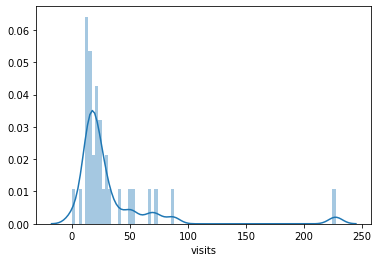

In [67]:
sns.distplot(randomWalk.visits, bins=80)

In [68]:
randomWalk.visits.max() - randomWalk.visits.min()

227

In [69]:
def variancia(lista):
    n = len(lista)
    mu = np.mean(lista)
    numerador = 0
    for i in lista:
        numerador += (i - mu)**2
    return numerador/n

In [70]:
variancia(randomWalk.visits)

1542.429752066116

In [71]:
randomWalk.visits.var()

1590.630681818182

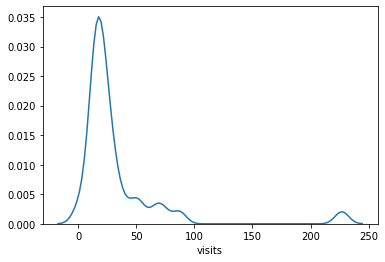

In [72]:
sns.distplot(randomWalk.visits, hist=False)

In [73]:
randomWalk.visits.std()

39.88271156551648

In [80]:
import pandas as pd
import numpy as np
import csv 
import string
import nltk 
import re 
import time
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import os
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
import sys
import warnings
from os import path
import ast
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.problem_transform import ClassifierChain
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, average_precision_score, precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import zero_one_loss
from sklearn.metrics import jaccard_score
import sklearn.metrics as skm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import time
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from skmultilearn.adapt import MLkNN
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from skmultilearn.adapt import BRkNNaClassifier
from sklearn.linear_model import RidgeClassifierCV

pd.options.display.max_seq_items = 2000
pd.options.display.max_colwidth = 90
pd.options.display.max_rows = 999

loggingFile = './experiment//TitleBody3GramTFIDF.txt'
binaryBodyTitle = './experiment/binaryBodyTitle.csv'
template = './experiment/dfTeste.csv'

In [81]:
data_classes.head()

,nodeNumber,node,visits,paths
0,0,Co-author,0,
1,1,User,73,User Meta-Reviewer Reviewer User AuthorNotReviewer Author User Author User Administr...
2,2,ProgramCommittee,20,ProgramCommittee ProgramCommittee ProgramCommittee ProgramCommittee ProgramCommittee...
3,3,AuthorNotReviewer,15,AuthorNotReviewer AuthorNotReviewer AuthorNotReviewer AuthorNotReviewer AuthorNotRev...
4,4,Conference,6,Conference Conference Conference Conference Conference Conference


In [82]:
#TF-ID
def run_tf_idf(data, configurationTFIDF, num_feature, tfIDFoutputFile):
    #we need to text max_feature with 10, 20, 25, 50 
    #, max_features=num_feature
    vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range = configurationTFIDF, max_features=num_feature)
        
    tf_idf_results = vectorizer.fit_transform(data['paths'])

    features = vectorizer.get_feature_names()

    print(features)

    scores = (tf_idf_results.toarray())
    output_tf_idf = pd.DataFrame(scores)
    
    output_tf_idf = pd.concat([data['nodeNumber'], output_tf_idf], axis=1)

    output_tf_idf.to_csv(tfIDFoutputFile, encoding='utf-8', header=False, index=False, sep=',')


    # remove words occuring less than 5 times
    #tfidf = TfidfVectorizer(min_df=5)
    #you can also remove common words:

    # remove words occuring in more than half the documents
    #tfidf = TfidfVectorizer(max_df=0.5)
    #you can also remove stopwords like this:
    

In [87]:
run_tf_idf(data_classes, (1,1), 25, './visits/data/tfIDFCMT.csv')

['acceptance', 'administrator', 'associatedchair', 'author', 'authornotreviewer', 'chairman', 'conferencechair', 'conferencemember', 'decision', 'document', 'externalreviewer', 'hasdecision', 'meta', 'owl', 'paper', 'paperabstract', 'paperfullversion', 'person', 'programcommitteechair', 'programcommitteemember', 'rejection', 'review', 'reviewer', 'thing', 'user']


In [84]:
#analyzing frequency of TOP 50 terms

def analyze_top(data, termFrequencyTop50):
    docs = data['paths'].tolist()

    cv = CountVectorizer()
    cv_fit=cv.fit_transform(docs)

    #print(cv.get_feature_names())
    #print(cv_fit.toarray())

    word_list = cv.get_feature_names()   

    count_list = cv_fit.toarray().sum(axis=0)
    term_frequency = dict(zip(word_list,count_list))

    a = sorted(term_frequency.items(), key=lambda x: x[1], reverse=True) 

    top50 = a[:100]
    df_frequency = pd.DataFrame(top50, columns =['term', 'frequency'])  

    print(df_frequency)

    df_frequency.to_csv(termFrequencyTop50, encoding='utf-8', header=False, index=False, sep=',')

    sns.set(font_scale = 2)
    plt.figure(figsize=(18,17))
    plt.xticks(rotation=90)
    plt.title("Frequency of terms ")
    plt.ylabel('term', fontsize=20)
    plt.xlabel('frequency', fontsize=20)
    ax = sns.barplot(x="frequency", y="term", data=df_frequency)
    
    return docs


                      term  frequency
0                   person        227
1         conferencemember        174
2                 reviewer        159
3                     user        146
4                   review        143
5                     meta        115
6                    paper        106
7                   author         90
8                      owl         88
9                    thing         88
10  programcommitteemember         79
11        paperfullversion         75
12           administrator         69
13                document         66
14   programcommitteechair         66
15       authornotreviewer         60
16         conferencechair         51
17                decision         49
18             hasdecision         48
19           paperabstract         45
20        externalreviewer         42
21         associatedchair         39
22              acceptance         34
23                chairman         26
24               rejection         26
25          

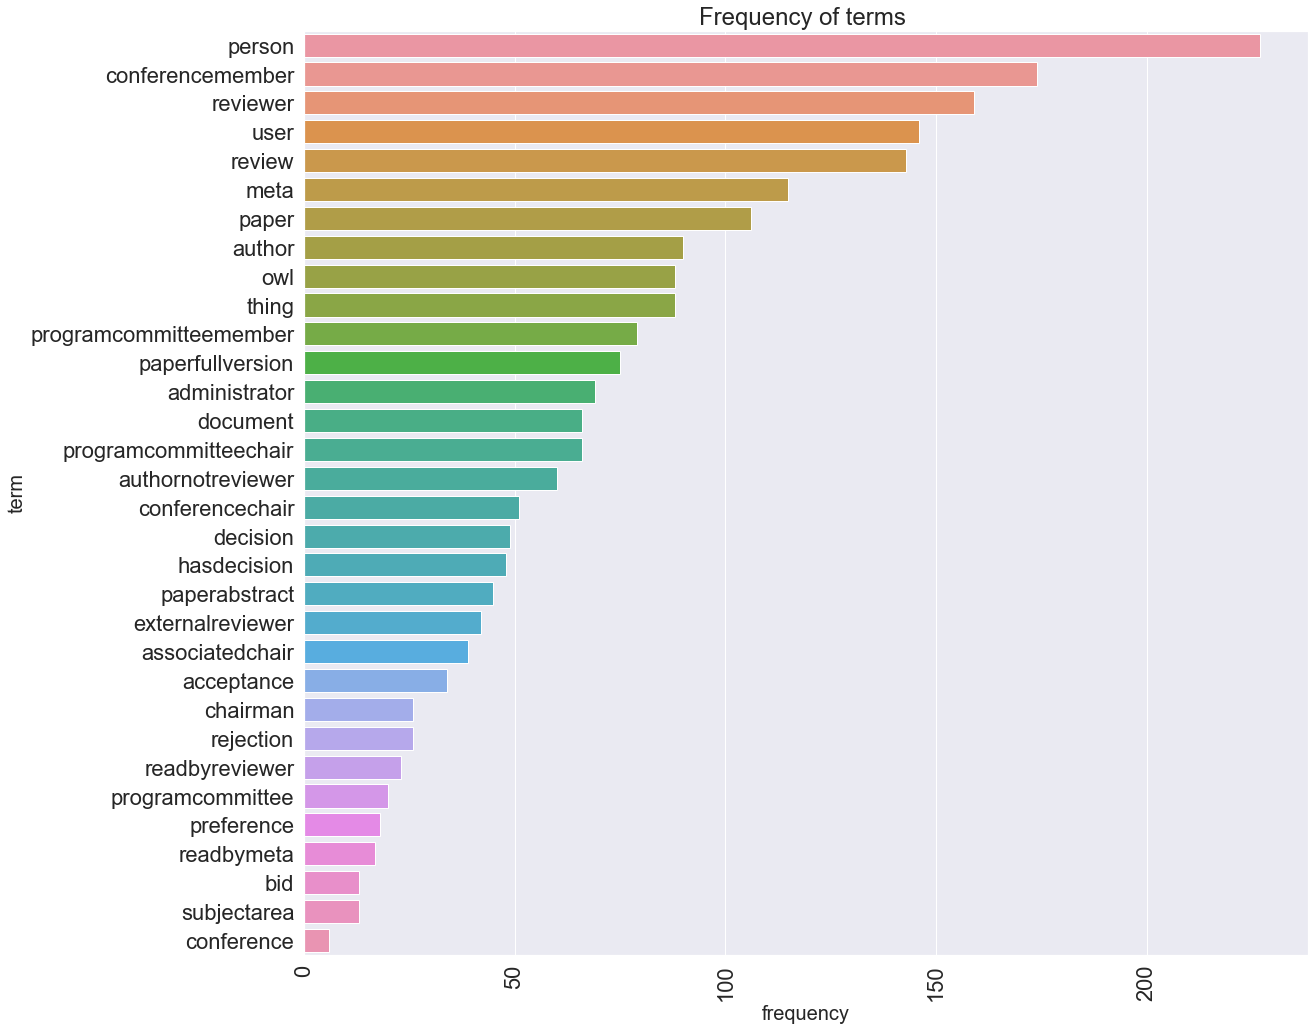

In [88]:
docs = analyze_top(data_classes, './visits/data/termFrequencyTop50CMT.csv')